In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import factorial
import timeit

In [2]:
import numpy as np
freq = np.array([162,267,271,185,111,61,27,8,3,1])

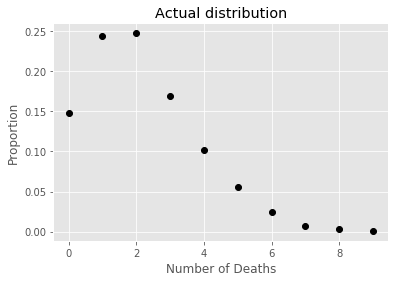

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## proportion of different number of deaths
plt.plot(np.arange(freq.size), freq/np.sum(freq), 'o', color='black')
plt.xlabel("Number of Deaths")
plt.ylabel("Proportion")
plt.title('Actual distribution');

In [4]:
lam= (freq*np.arange(1,11)).sum()/freq.sum()

In [5]:
lam # the calculated value of lambda parameter

3.156934306569343

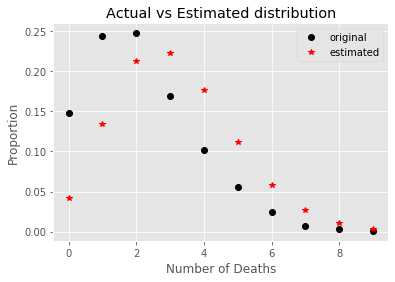

In [6]:
t = np.arange(0,10)
d = np.exp(-lam)*np.power(lam, t)/factorial(t)

plt.plot(np.arange(freq.size), freq/np.sum(freq), 'o', color='black', label= 'original')
plt.plot(t, d, '*', label='estimated', color='red')
plt.xlabel("Number of Deaths")
plt.ylabel("Proportion")
plt.title('Actual vs Estimated distribution')
plt.legend()
plt.show()

We can easily see that the estimated distribution is not a good fit for the given distribution

# Using Maximum Likelihood estimator for determing mu1, mu2 and alpha.

In [7]:
t

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
def likelihood(alpha,mu1,mu2):
    return -(np.sum(freq*np.log(alpha*np.exp(-mu1)*np.power(mu1,t)/factorial(t) + (1-alpha)*np.exp(-mu2)*np.power(mu2,t)/factorial(t))))

In [9]:
# Building the model
alpha = 0.3
mu1   = 1
mu2   = 3

alpha_list=[]
mu1_list=[]
mu2_list=[]
likelihood_list=[]
L = 0.001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent


# Performing Gradient Descent 
for i in np.arange(1,epochs): 
    
    D_alpha =  np.sum(freq*(((np.exp(-mu1)*np.power(mu1,t)/factorial(t)) - (np.exp(-mu2)*np.power(mu2,t)/factorial(t))) /((alpha*np.exp(-mu1)*np.power(mu1,t)/factorial(t)) + ((1-alpha)*np.exp(-mu2)*np.power(mu2,t)/factorial(t))))) # Derivative wrt alpha
    
    D_mu1 =  np.sum(freq*((alpha*np.power(float(mu1),t-1)*(np.exp(-mu1))*(t-mu1)/factorial(t)) /((alpha*np.exp(-mu1)*np.power(mu1,t)/factorial(t)) + ((1-alpha)*np.exp(-mu2)*np.power(mu2,t)/factorial(t))))) # Derivative wrt mu1
 
    D_mu2 =  np.sum(freq*(((1-alpha)*np.power(float(mu2),t-1)*(np.exp(-mu2))*(t-mu2)/factorial(t)) /((alpha*np.exp(-mu1)*np.power(mu1,t)/factorial(t)) + ((1-alpha)*np.exp(-mu2)*np.power(mu2,t)/factorial(t))))) # Derivative wrt alpha
    
    alpha = alpha + L * D_alpha   # Update alpha
    mu1 = mu1 + L * D_mu1         # Update mu1
    mu2 = mu2 + L * D_mu2         # Update mu2
    
    likelihood= np.sum(freq*np.log(alpha*np.exp(-mu1)*np.power(mu1,t)/factorial(t) + (1-alpha)*np.exp(-mu2)*np.power(mu2,t)/factorial(t)))
    
    
    alpha_list.append(alpha)
    mu1_list.append(mu1)
    mu2_list.append(mu2)
    likelihood_list.append(likelihood)
    
    if i>3:
        if (likelihood_list[i-1] - likelihood_list[i-2]< 0.000001):             # if log-likelihood doesn't converge fast enough,
            print("loop stopped for low converging rate at epoch={}".format(i)) #  this will break out of the loop
            break;
print('\n')     
print ("alpha = {}".format(alpha))
print ("mu1 = {}".format(mu1))
print ("mu2 = {}".format(mu2))

loop stopped for low converging rate at epoch=81


alpha = 0.35742002052442273
mu1 = 1.2515603200332464
mu2 = 2.6604624826159147


Using tolerance value of log-likelihood value estimate to stop the loop if the convergence has slowed down quite a bit, otherwise it will iterate for 1000 iterations.

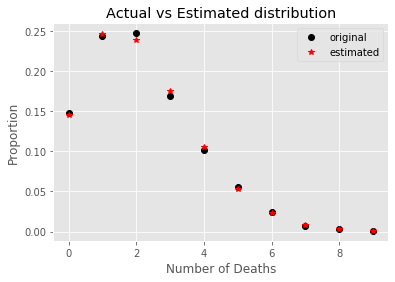

In [10]:
from scipy.special import factorial

t = np.arange(0,10)
d = 0.35*np.exp(-1.25)*np.power(1.25, t)/factorial(t) + (1-0.35)*np.exp(-2.66)*np.power(2.66, t)/factorial(t)    # mixture of the two poisson variables

plt.plot(np.arange(freq.size), freq/np.sum(freq), 'o', color='black', label= 'original')
plt.plot(t, d, '*', label='estimated', color='red')
plt.xlabel("Number of Deaths")
plt.ylabel("Proportion")
plt.title('Actual vs Estimated distribution')
plt.legend()
plt.show()

We can see the mixture of two poisson distributions is a really good fit for the given data

# plotting the likelihood and parameter estimates value to show their convergences(max value)

Text(0.5, 0, 'iterations')

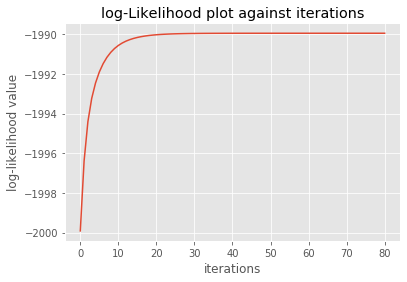

In [11]:
plt.plot(likelihood_list)
plt.title('log-Likelihood plot against iterations')
plt.ylabel('log-likelihood value')
plt.xlabel('iterations')


Text(0.5, 0, 'alpha')

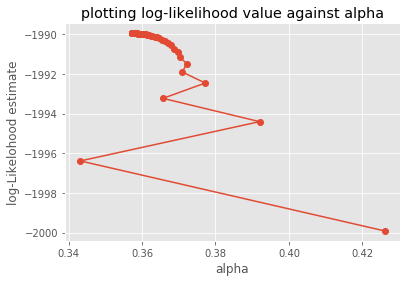

In [12]:
plt.plot(alpha_list, likelihood_list, '-o')
plt.title('plotting log-likelihood value against alpha')
plt.ylabel('log-Likelohood estimate')
plt.xlabel('alpha')

Text(0.5, 0, 'mu1')

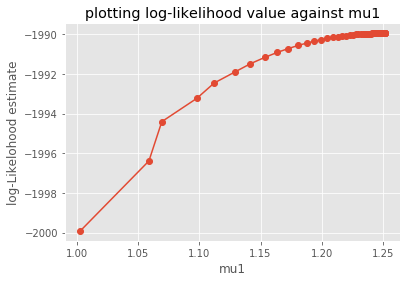

In [13]:
plt.plot(mu1_list, likelihood_list, '-o')
plt.title('plotting log-likelihood value against mu1')
plt.ylabel('log-Likelohood estimate')
plt.xlabel('mu1')

Text(0.5, 0, 'mu2')

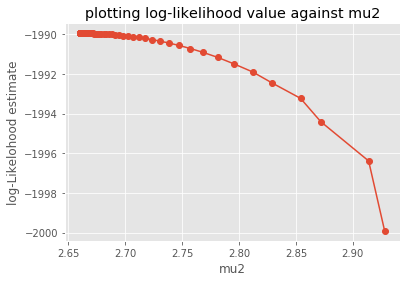

In [14]:
plt.plot(mu2_list, likelihood_list,'-o')
plt.title('plotting log-likelihood value against mu2')
plt.ylabel('log-Likelohood estimate')
plt.xlabel('mu2')

# Using python's scipy library for optmizing the parameters of the likelihood function

In [15]:
def likelihood(x):
    return -(np.sum(freq*np.log(x[0]*np.exp(-x[1])*np.power(x[1],t)/factorial(t) + (1-x[0])*np.exp(-x[2])*np.power(x[2],t)/factorial(t))))

In [16]:
from scipy import optimize

In [17]:
initial= [0.5,1,2.5]

In [18]:
fit= optimize.minimize(likelihood,x0=initial, method='SLSQP', tol=0.00001)

C:\Users\gaura\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


In [19]:
fit

     fun: 1989.9458623783908
     jac: array([-0.00637817,  0.01138306, -0.00311279])
 message: 'Optimization terminated successfully.'
    nfev: 132
     nit: 23
    njev: 23
  status: 0
 success: True
       x: array([0.36023958, 1.25683523, 2.66377831])

In [20]:
print('The value for the parameter estimates using scipy.optmize library')
print('\n')
print ("alpha = {}".format(fit.x[0]))
print ("mu1 = {}".format(fit.x[1]))
print ("mu2 = {}".format(fit.x[2]))

The value for the parameter estimates using scipy.optmize library


alpha = 0.3602395827258817
mu1 = 1.2568352257388802
mu2 = 2.6637783119222003


# calculating confidence intervals on the parameters using bootstrapping

In [21]:
alpha=[]
mu1=[]
mu2=[]
for i in range(1000):
    initial= [0.3+(0.00005*i),1+(0.001*i),2.5+(0.001*i)]
    fit= optimize.minimize(likelihood,x0=initial, method='SLSQP', tol=0.0001)
    alpha.append(fit.x[0])
    mu1.append(fit.x[1])
    mu2.append(fit.x[2])

C:\Users\gaura\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


In [22]:
print("alpha confidence interval : \n " )
print((np.percentile(np.array(alpha), 2.5),np.percentile(np.array(alpha), 97.5)))

alpha confidence interval : 
 
(0.3586490765924375, 0.3611665534190897)


In [23]:
print("mu1 confidence interval : \n" )
print((np.percentile(np.array(mu1), 2.5),np.percentile(np.array(mu1), 97.5)))

mu1 confidence interval : 

(1.2539523364952165, 1.2585000237698696)


In [24]:
print("mu2 confidence interval :\n " )
print((np.percentile(np.array(mu2), 2.5),np.percentile(np.array(mu2), 97.5)))

mu2 confidence interval :
 
(2.6618980708361746, 2.6650774990065154)


# EM algorithm

In [25]:
alpha, mu1,mu2 = 0.3, 1,3

for i in range(1000):
    # E step
    z = (alpha*np.exp(-mu1)*np.power(mu1,t))/(alpha*np.exp(-mu1)*np.power(mu1,t)+ (1-alpha)*np.exp(-mu2)*np.power(mu2,t))
    
    # M step
    alpha= np.sum(freq*z)/np.sum(freq)
    mu1 = np.sum(freq*t*z)/np.sum(freq*z)
    mu2= np.sum(freq*t*(1-z))/np.sum(freq*(1-z))
    
    
print('The value for the parameter estimates using Expectation maximization algorithm : \n')
print ("alpha = {}".format(alpha))
print ("mu1 = {}".format(mu1))
print ("mu2 = {}".format(mu2))

The value for the parameter estimates using Expectation maximization algorithm : 

alpha = 0.3592667543620744
mu1 = 1.2550188670447502
mu2 = 2.6626490246255856


# 4. comparing EM with gradient ascent

EM has twos steps:
1. calculate the expectation value(basically probability) for each of the points on the dataset to fall into both of these distributions
2. maximization step to update the parameters by using the expectation values as weights of individual points in the dataset.

Gradient ascent has also two steps:
1. calculating the gradient of the likelihood function with respect to each parameter
2. update the parameters using these gradient values and Learning rate provided at start.

# EM advantage
the reason why EM is used over gradient ascent in some optimization tasks is that sometimes likelihood fundtion is not differentiable, rendering gradient ascent/descent not directly applicable on f(alpha, mu1, mu2). Also, EM has a property that when doing coordinate ascent/descent the lieklihood function doesn’t have to be maximized. Indeed, as long as likelihood function is improved (no matter how much) with respect to parameters at each step, likelihood function is still guaranteed to converge to a local optimum. This property makes EM sometimes more favorable for computational reasons because improving the likelihood could be much easier than maximizing it.

# Gradient Ascent advantage
 Gradient Ascent is faster than EM

# how can I say Gradient Ascent is faster?

EM algorithm took 81 iterations to converge to the optmimum(with accetable tolerances) while EM takes more than 600 iterations to reach the values in accetable limits for this problem.( also we started with the same initial values for both the algorithms)